In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('WineQT.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [5]:
df.drop(columns='Id',axis=1,inplace=True)

<Axes: xlabel='quality', ylabel='count'>

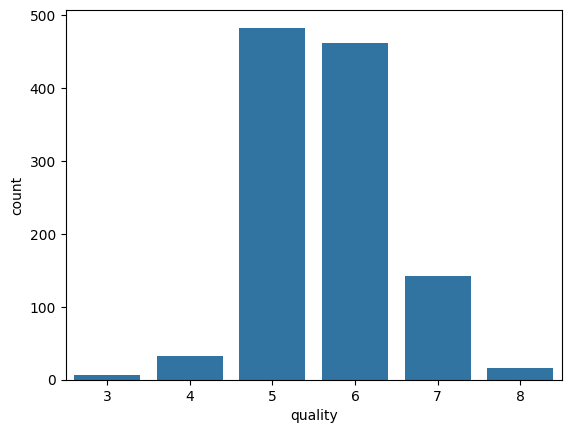

In [6]:
sns.countplot(x=df['quality'])

<Axes: >

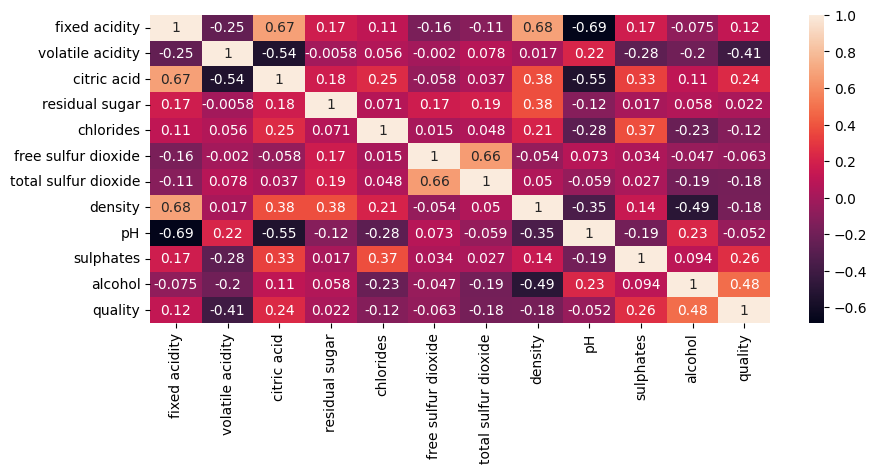

In [9]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)

In [13]:
df.drop(columns='residual sugar',axis=1,inplace=True)

In [14]:
df['quality'].value_counts()

quality
5    483
6    462
7    143
4     33
8     16
3      6
Name: count, dtype: int64

In [15]:
x=df.drop(columns='quality',axis=1)

In [16]:
y=df['quality']

In [41]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'chlorides',
       'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH',
       'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [17]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)

In [18]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x, y)

In [19]:
y_resampled.value_counts()

quality
5    483
6    483
7    483
4    483
8    483
3    483
Name: count, dtype: int64

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_resampled,y_resampled,random_state=42)

In [43]:
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train-3)
y_test = to_categorical(y_test-3)

In [54]:
y_train.shape

(2173, 6)

In [44]:
y_train.shape

(2173, 6)

In [45]:
from tensorflow.keras.layers import Dense, Input,Dropout
from tensorflow.keras.models import Sequential

In [46]:
num_classes = y_train.shape[1]

In [47]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')
])


In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [49]:
history = model.fit(x_train, y_train, epochs=150, batch_size=16, validation_data=(x_test, y_test))

Epoch 1/150


136/136 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.3147 - loss: 1.6280 - val_accuracy: 0.5669 - val_loss: 1.1101
Epoch 2/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5112 - loss: 1.1767 - val_accuracy: 0.6290 - val_loss: 0.9663
Epoch 3/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5589 - loss: 1.0457 - val_accuracy: 0.6538 - val_loss: 0.8802
Epoch 4/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5900 - loss: 0.9801 - val_accuracy: 0.6538 - val_loss: 0.8260
Epoch 5/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6105 - loss: 0.9275 - val_accuracy: 0.6552 - val_loss: 0.7959
Epoch 6/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6772 - loss: 0.8336 - val_accuracy: 0.7034 - val_loss: 0.7314
Epoch 7/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6866 - loss: 0.8034 - val_accuracy: 0.7117 - val_loss: 0.7004
Epoch 8/150
136/136 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6929 - loss: 0.7779 - val_accuracy: 0.7145

In [50]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {accuracy:.2f}")

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8746 - loss: 0.3388 
Test Accuracy: 0.86


In [51]:
model.save("wine_quality_model.h5")

In [52]:
import joblib
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

In [71]:
sample = np.array([[17.4,0.35,0.33,0.68,29.0,26.0,0.9947,030.36,0.6,011.9]])
prediction = model.predict(sample)
print("Probabilities:", prediction)
print("Predicted class:", prediction.argmax()+3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Probabilities: [[0.0000000e+00 2.8457720e-26 2.9073091e-02 9.7092688e-01 1.2510143e-25
  0.0000000e+00]]
Predicted class: 6
